In [21]:
import imgaug.augmenters as iaa
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
#1. Load Dataset
img = cv.imread("Images/n02085620-Chihuahua/n02085620_7.jpg")

In [6]:
#2 Image augmentation
augmentation = iaa.Sequential([
    #FLIP
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    #AFFINE
    iaa.Affine(translate_percent={"X": (-0.5,0.5), "y": (-0.4,0.4)},

    rotate=(-30,30),
    scale=(0.5,1.5)),
    #MULTIPLY
    iaa.Multiply((0.8,1.2)),
    # LinearContrast
    iaa.LinearContrast((0.6, 1.4)),
    #Perform methods below only sometimes
    iaa.Sometimes(0.5,
                  #GAUSSIANBLUR
                  iaa.GaussianBlur((0.0,3.0))
                  )


])

In [7]:
augmented_image = augmentation(images=img)

In [7]:
#3 Show Images
cv.imshow("Image",augmented_image)
cv.waitKey(10)

-1

In [43]:
from PIL import Image

# Charger l'image
img_test = Image.open("Images/n02085620-Chihuahua/n02085620_7.jpg")
img_test = np.array(img_test)

In [44]:
# setting dim of the resize
height = 299
width = 299
dim = (width, height)
# resize image with OpenCV
res_img = cv.resize(img_test, dim, interpolation=cv.INTER_LINEAR)

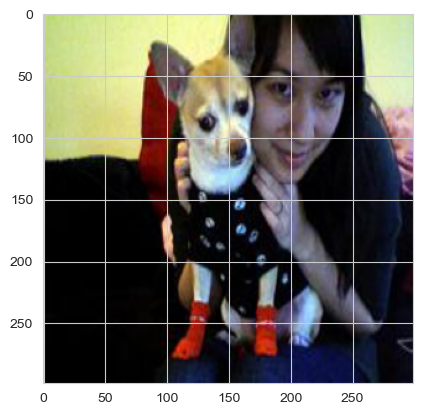

In [45]:
imgplot = plt.imshow(res_img)

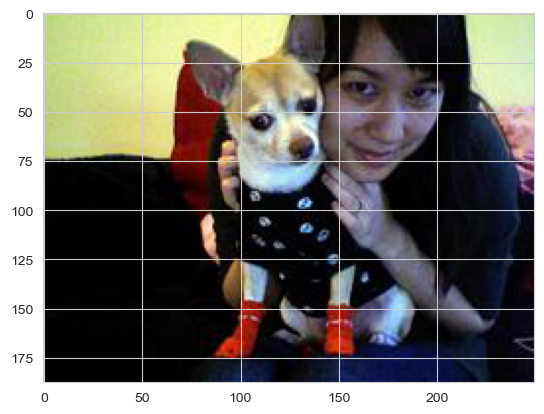

In [46]:
imgplot = plt.imshow(img_test)

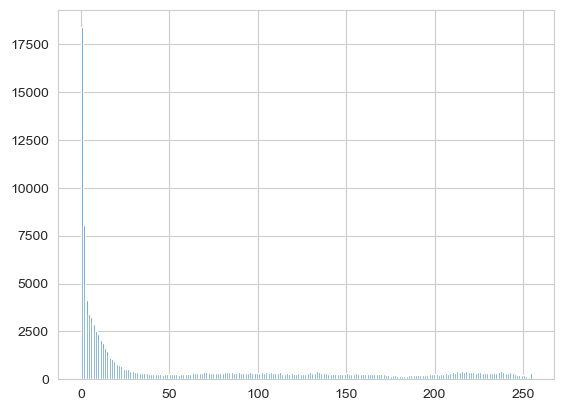

In [47]:
n, bins, patches = plt.hist(img_test.flatten(), bins=range(256))
plt.show()

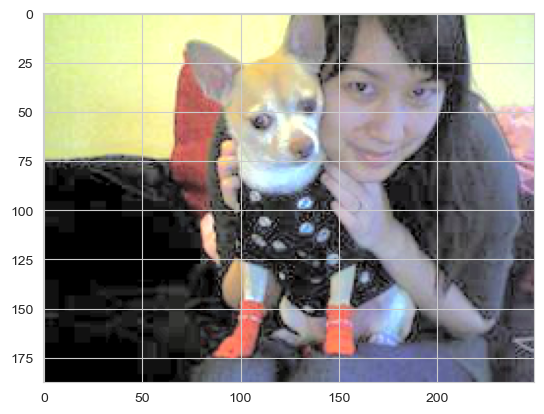

In [48]:
img_yuv = cv.cvtColor(img_test, cv.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)

plt.imshow(img_output)
plt.show()

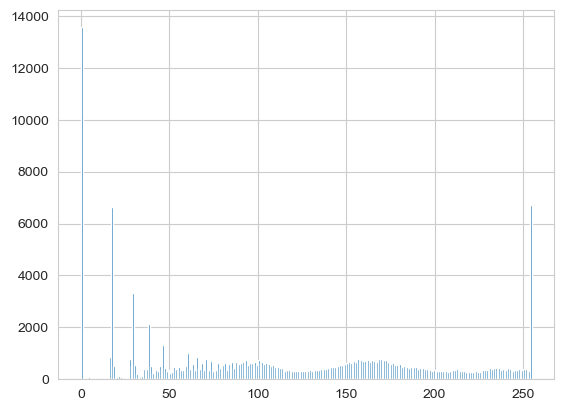

In [49]:
n, bins, patches = plt.hist(img_output.flatten(), bins=range(256))
plt.show()

In [39]:
img_test[:,:,0] = cv.equalizeHist(img_test[:,:,0])

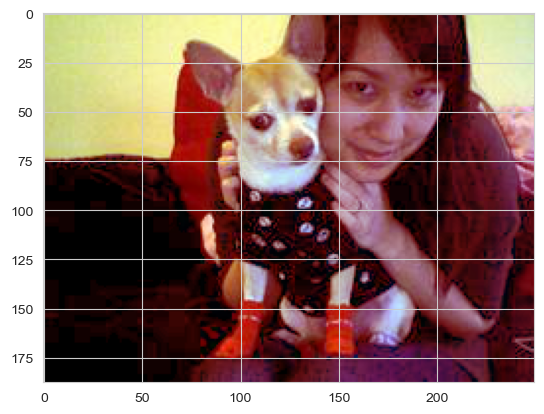

In [40]:
imgplot = plt.imshow(img_test)

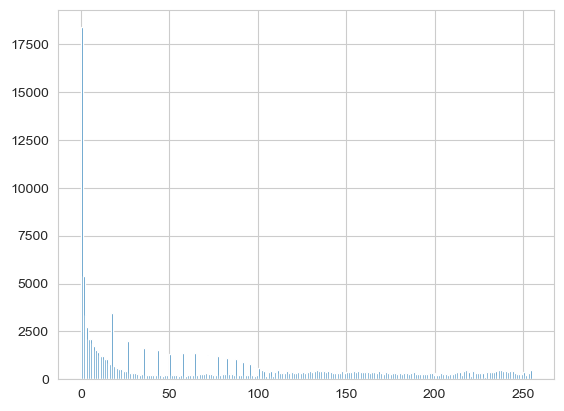

In [41]:
n, bins, patches = plt.hist(img_test.flatten(), bins=range(256))
plt.show()

In [ ]:
# Transform image with differents color sets
img_RGB = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)
img_grayscale = cv.cvtColor(img_test, cv.COLOR_RGB2GRAY)
img_YUV = cv.cvtColor(img_test,cv.COLOR_BGR2YUV)

In [ ]:
# Equalization
img_YUV[:,:,0] = cv.equalizeHist(img_YUV[:,:,0])
img_equ = cv.cvtColor(img_YUV, cv.COLOR_YUV2RGB)
plot_histogram(["RGB", img_RGB], ["Equalized", img_equ])



In [15]:
import glob
images = []
for f in glob.iglob("Images/n02085620-Chihuahua/*"):
    img = Image.open(f)
    w, h = img.size
    print("Largeur : {} px, hauteur : {} px".format(w, h))
    images.append(np.array(img))

# images = np.array(images)
print(format(images))

Largeur : 375 px, hauteur : 500 px
Largeur : 500 px, hauteur : 375 px
Largeur : 500 px, hauteur : 375 px
Largeur : 500 px, hauteur : 337 px
Largeur : 500 px, hauteur : 495 px
Largeur : 500 px, hauteur : 375 px
Largeur : 500 px, hauteur : 333 px
Largeur : 375 px, hauteur : 500 px
Largeur : 375 px, hauteur : 500 px
Largeur : 500 px, hauteur : 333 px
Largeur : 500 px, hauteur : 385 px
Largeur : 500 px, hauteur : 500 px
Largeur : 500 px, hauteur : 333 px
Largeur : 500 px, hauteur : 333 px
Largeur : 500 px, hauteur : 375 px
Largeur : 445 px, hauteur : 500 px
Largeur : 240 px, hauteur : 206 px
Largeur : 500 px, hauteur : 375 px
Largeur : 382 px, hauteur : 384 px
Largeur : 500 px, hauteur : 334 px
Largeur : 500 px, hauteur : 319 px
Largeur : 500 px, hauteur : 375 px
Largeur : 500 px, hauteur : 333 px
Largeur : 500 px, hauteur : 333 px
Largeur : 299 px, hauteur : 415 px
Largeur : 333 px, hauteur : 500 px
Largeur : 333 px, hauteur : 500 px
Largeur : 395 px, hauteur : 495 px
Largeur : 375 px, ha

In [2]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 250 px, hauteur : 188 px


In [3]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (0, 0, 0)


In [9]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
mat

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (188, 250, 3)


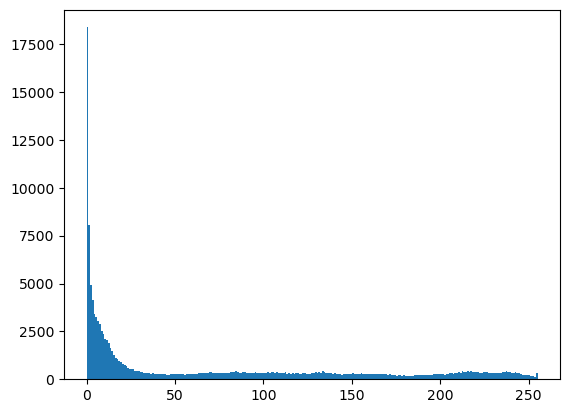

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Charger l'image comme matrice de pixels
img_array = np.array(img)

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_array.flatten(), bins=range(256))
plt.show()

In [19]:
from PIL.ImageOps import autocontrast
img_normalized = autocontrast(img, ignore=None)

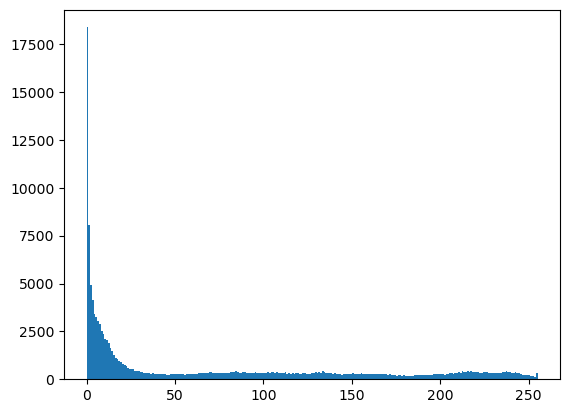

In [20]:
img_array_norm = np.array(img_normalized)

n, bins, patches = plt.hist(img_array_norm.flatten(), bins=range(256))
plt.show()

In [ ]:
# Equalization
img_YUV[:,:,0] = cv.equalizeHist(img_YUV[:,:,0])
img_equ = cv.cvtColor(img_YUV, cv.COLOR_YUV2RGB)
plot_histogram(["RGB", img_RGB], ["Equalized", img_equ])